
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [3]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')
seaborn.set_theme(style='ticks')

## Lectura del dataset

En la notebook *00* se explican los detalles de la siguiente sección.

In [4]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [5]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Qué herramientas (prácticas y/o teóricas) son útiles para explorar la base, y descubrir patrones o asociaciones?**

Para ello considere (igual al ejercicio anterior):

1. Seleccionar las columnas relevantes para analizar.

**Respuesta**
Dejando de lado los lenguajes de programación del ejercicio anterior, se procede a elegir las siguientes columnas
- Variables Numéricas: `salary_monthly_NETO`, `salary_monthly_BRUTO`, y `profile_age`.
- Variables Categóricas: `work_contract_type`, y `salary_in_usd`.
- Variables Ordinales: `profile_studies_level`, y `profile_studies_level_state` (también podría ser categórica).

2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones.

**Respuesta**
Observando los datos se pudo apreciar la existencia de valores *NaN* y erróneos, por lo que se procedió a eliminar los valores nulos y los menores a 10000 que existían en la columna `salary_monthly_NETO`.
Para los valores extremos superiores, se procedió a eliminar los mayores al percentil 99, entendiendo que esto genera un sesgo en la media muestral.
Un razonamiento idéntico se aplica para la columna `salary_monthly_BRUTO`.
En el caso de las columnas adicionales se procedió de la siguiente manera
- Se eliminan las filas con edades mayores a 100 años en `profile_age`, ya que carecen de sentido.
- Se aplica una transformación a los valores de `salary_in_usd`, para poder trabajar con valores *booleanos* en lugar de *strings*.

### 1. Selección de Columnas Relevantes

In [6]:
# Constantes Auxiliares.

# Numéricas
neto = 'salary_monthly_NETO'
bruto = 'salary_monthly_BRUTO'
edad = 'profile_age'
# Categóricas
contrato = 'work_contract_type'
dolares = 'salary_in_usd'
# Ordinales
nivel = 'profile_studies_level'
estado = 'profile_studies_level_state'

# Selección de Columnas Relevantes.
relevant_columns = [neto, bruto, edad, contrato, dolares, nivel, estado]

df.columns

Index(['profile_gender', 'profile_age', 'work_country', 'work_province',
       'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university',
       'profile_specialization_courses', 'profile_open_source_contributions',
       'profile_programming_as_hobby', 'work_role', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'tools_IDEs', 'tools_work_pc_os',
       'tools_cellphone_os', 'work_on_call_duty', 'salary_on_call_duty_charge',
       'work_on_call_duty_charge_type', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_satisfaction', 'salary_comparison_last_semester',
       'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment_2020',
       'salary_percentage_inf

### 2. Selección de Filas Relevantes

In [7]:
def filtrar_salarios(df, salario):
    """
    Dada una columna de salarios, aplica una serie de filtros al df.
    """

    # ¿Cuántos NaN existen en la columna de salarios?
    print(f'Cantidad de salarios nulos: {df[salario].isna().sum()}')
    # Limpieza de valores nulos.
    df.dropna(subset=[salario], inplace=True)

    # Salario Mínimo para la subpoblación de estudio.
    min_salary = 10000
    # ¿Cuántos salarios erróneos existen en la columna de salarios?
    print(f'Cantidad de salarios <= 10K: {(df[salario] <= min_salary).sum()}')
    # Considerando el salario mínimo.
    df = df[df[salario] > min_salary]

    # Salario Máximo para la subpoblación de estudio (Percentil 99).
    max_salary = df[salario].quantile(0.99)
    print(f'Percentil 99: {max_salary}')
    # ¿Cuántos salarios son anómalos en la columna de salarios?
    print(f'Cantidad de salarios anómalos: {(df[salario] >= max_salary).sum()}')
    # Considerando el salario del percentil 99.
    df = df[df[salario] < max_salary]

    return df

In [8]:


print('Filtrado según salario BRUTO:')
df = filtrar_salarios(df, bruto)
print('----------')

print('Filtrado según salario NETO:')
df = filtrar_salarios(df, neto)
print('----------')

# Datos Muestrales (sobre el salario NETO y el salario BRUTO).
print(df[[neto, bruto]].describe())

Filtrado según salario BRUTO:
Cantidad de salarios nulos: 0
Cantidad de salarios <= 10K: 197
Percentil 99: 641939.2999999978
Cantidad de salarios anómalos: 59
----------
Filtrado según salario NETO:
Cantidad de salarios nulos: 197
Cantidad de salarios <= 10K: 61
Percentil 99: 400000.0
Cantidad de salarios anómalos: 59
----------
       salary_monthly_NETO  salary_monthly_BRUTO
count          5522.000000           5522.000000
mean          88651.609779         114537.589643
std           53566.195077          74585.652842
min           10700.000000          10602.410000
25%           54000.000000          64925.000000
50%           79000.000000          96009.000000
75%          105000.000000         140000.000000
max          396000.000000         609000.000000


In [9]:
# Edad Máxima para la subpoblación de estudio.
max_age = 100
# ¿Cuántas edades erróneas existen en la columna de edades?
print(f'Cantidad de edades >= 100: {(df[edad] >= max_age).sum()}')
# Considerando la edad máxima.
df = df[df[edad] < max_age]
print('----------')

# Datos Muestrales (sobre la edad).
print(df[edad].describe())

Cantidad de edades >= 100: 2
----------
count    5520.000000
mean       32.542572
std         7.257713
min        18.000000
25%        27.000000
50%        31.000000
75%        37.000000
max        67.000000
Name: profile_age, dtype: float64


In [10]:
print(f'Posibles valores de VA: {df[dolares].unique()}')
# Por razones de comodidad, queremos trabajar con valores booleanos en esta columna.
df[dolares] = df[dolares].notna()
print(f'Posibles valores de VA: {df[dolares].unique()}')
print('----------')

# Datos Muestrales (sobre el salario en dólares).
print(df[dolares].describe())

Posibles valores de VA: [nan 'Mi sueldo está dolarizado']
Posibles valores de VA: [False  True]
----------
count      5520
unique        2
top       False
freq       4992
Name: salary_in_usd, dtype: object


In [11]:
# Nos quedamos con las columnas que analizaremos.
df = df[relevant_columns]

print(f'Dimensiones del DF: {df.shape}')
df[:5]

Dimensiones del DF: (5520, 7)


,salary_monthly_NETO,salary_monthly_BRUTO,profile_age,work_contract_type,salary_in_usd,profile_studies_level,profile_studies_level_state
0,43000.0,53000.0,26,Full-Time,False,Universitario,En curso
1,63000.0,79000.0,29,Full-Time,False,Universitario,En curso
2,127000.0,160000.0,22,Full-Time,False,Secundario,Completado
3,102000.0,130000.0,39,Full-Time,False,Posgrado,Incompleto
4,106000.0,140000.0,32,Full-Time,False,Universitario,En curso


## a) Densidad conjunta

¿Qué herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables **numéricas** y dos variables **categóricas**. Visualice la base según varias de las variables elegidas. ¿Puede describir de alguna forma el comportamiento de sus datos? ¿Qué herramientas utilizaría? Describa.

*Se eligen las variables:*

*Variables Numéricas: salary_monthly_NETO, salary_monthly_BRUTO, y profile_age.*

*Variables Categóricas: work_contract_type, y salary_in_usd.*

*Para estudiar varibles categoricas entre si, se pueden utilizar tablas de contingencia, para estudiar las variables numericas se pueden usar graficos de distribcuión conjunta, observando en los distintos ejes las distintas variables, y para estudiar categoricas y numericas, seaborn nos da herramientas como los graficos, pairplot y catplot, con las posibilidades de utilizar las representaciones de variables categoricas con distintos colores o marcadores.*

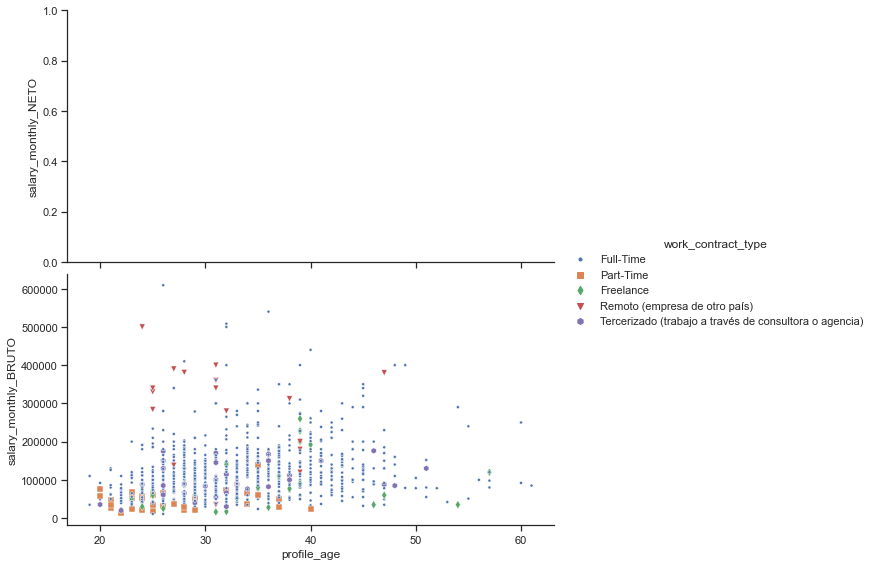

In [12]:
order = [ 'Full-Time'
        , 'Part-Time'
        , 'Freelance'
        , 'Remoto (empresa de otro país)'
        , 'Tercerizado (trabajo a través de consultora o agencia)'
        ]

# Para evitar superposición de puntos, solo se grafica una muestra de los datos.
seaborn.pairplot(data=df.sample(1000),
                 x_vars=edad,
                 y_vars=[neto, bruto],
                 hue=contrato,
                 hue_order=order,
                 markers=['.', 's', 'h', 'd', 'v'],
                 aspect=2, height=4);

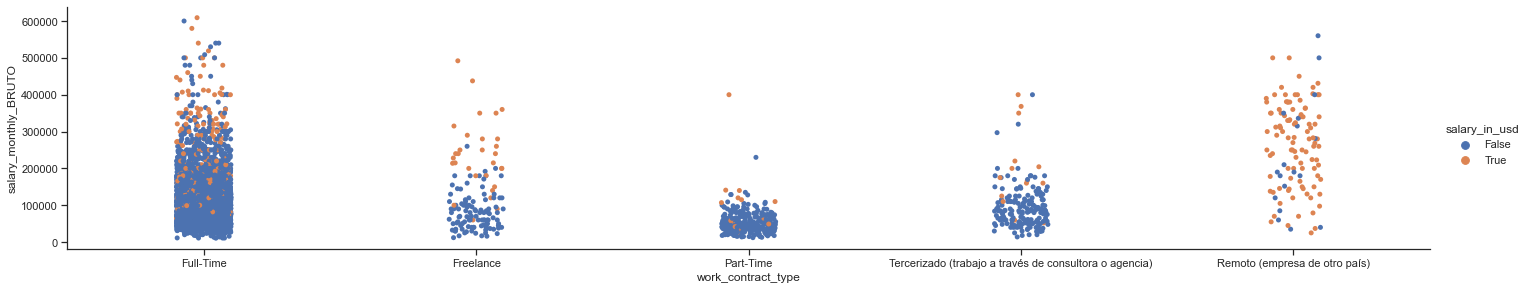

In [13]:
seaborn.catplot(data=df,
                x=contrato,
                y=bruto,
                hue=dolares,
                aspect=5, height=4);

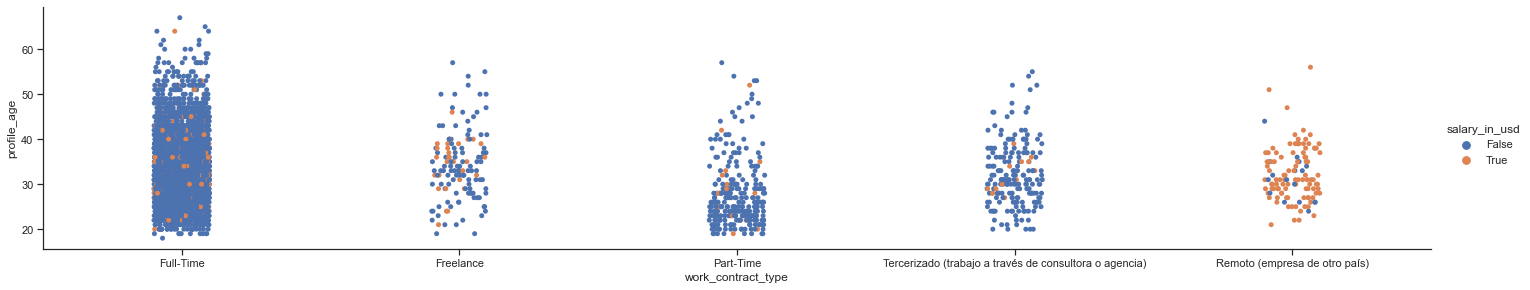

In [14]:
seaborn.catplot(data=df,
                x=contrato,
                y=edad,
                hue=dolares,
                aspect=5, height=4);

In [15]:
pd.crosstab(columns=df[contrato],
            index=df[dolares],
            normalize='columns',
            margins=True)

work_contract_type,Freelance,Full-Time,Part-Time,Remoto (empresa de otro país),Tercerizado (trabajo a través de consultora o agencia),All
salary_in_usd,,,,,,
False,0.779412,0.922852,0.944056,0.153846,0.929293,0.904348
True,0.220588,0.077148,0.055944,0.846154,0.070707,0.095652


**Respuesta**

Se puede observar al analizar las varibles de salario con respecto a la edad y al tipo de contrato, que los contratos part-time parecieran estar asociados a personas más jovenes, además de a menores salarios.

Al estudiar el monto del salario, la moneda de pago y el tipo de contrato, se observa que los trabajadores remotos con salarios en dolares son muchos más que los que tienen salarios no dolarizados, pareciera tambien que los salarios dolarizados son superiores a los no dolarizados (conclusiones a las que se llegaron en el entregable 1), tambien se vuelve a observar que los trabajadores part-time tienen los menores salarios.

Analizando la tabla de contingencia se refuerza la idea de la dolarizacion del trabajo remoto y analizando el resto de tipos de contrato se obser una mayor dolarizacion en trabajadores Freelance



## b) Asociación

Necesitamos decidir si sacar o no la columna de salario bruto, para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el salario neto? ¿Qué abordaje y medidas utilizaría?

(0.0, 400000.0)

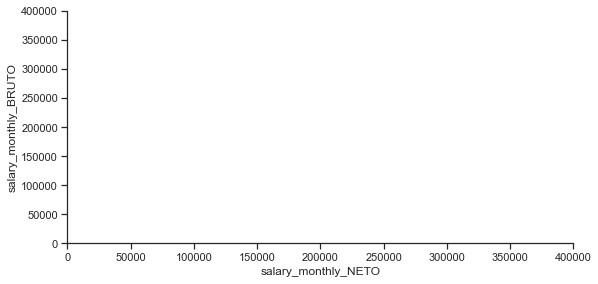

In [16]:
seaborn.pairplot(data=df,
                 x_vars=neto,
                 y_vars=bruto,
                 aspect=2, height=4);
plt.ylim(0, 400000)
plt.xlim(0, 400000)


In [17]:
# Calculo la correlación entre las columnas de salarios NETO y BRUTO.
df[[neto, bruto]].corr()

,salary_monthly_NETO,salary_monthly_BRUTO
salary_monthly_NETO,1.00000,0.94111
salary_monthly_BRUTO,0.94111,1.00000


**Respuesta**

El *pairplot* nos permite realizar de forma conjunta los gráficos de dispersión para todas las combinaciones de dos *features* sacados de un conjunto de *features* de interés.
En nuestro caso, solo nos interesan estudiar las variables aleatorias correspondientes a los salarios **bruto** y **neto**.
El gráfico nos permite obtener, entre otras cosas, una primera indicación de la *correlación* entre ambos features.
Se puede apreciar que la dispersión de los puntos se asemeja a la recta $x = y$ (se podría decir al observar la dispersión que existe una relacion directa entre las variables $x$ e $y$)

Acompañando al gráfico, calculamos la **tabla de correlación** de ambas variables, obteniendo un valor muy cercano a uno.
Lo cual implica que existe una *correlación positiva* entre ambos *features*.

En definitiva, claramente hay una *correlación* entre ambas variables, por lo que **no** son independientes.
Por nuestro conocimiento sobre el tema, sabemos que en situaciones normales el salario neto de una persona debería ser equivalente al salario bruto descontado un cierto porcentaje, por lo que el resultado obtenido era esperable.

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija **dos** subpoblaciones numerosas), y grafique de manera comparativa ambos histogramas de la variable `salary_monthly_NETO`.
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación.

In [18]:
sorted_studies_levels = [ 'Primario'
                        , 'Secundario'
                        , 'Terciario'
                        , 'Universitario'
                        , 'Posgrado'
                        , 'Doctorado'
                        , 'Posdoctorado'
                        ]

sorted_studies_state = [ 'En curso'
                       , 'Incompleto'
                       , 'Completado'
                       ]

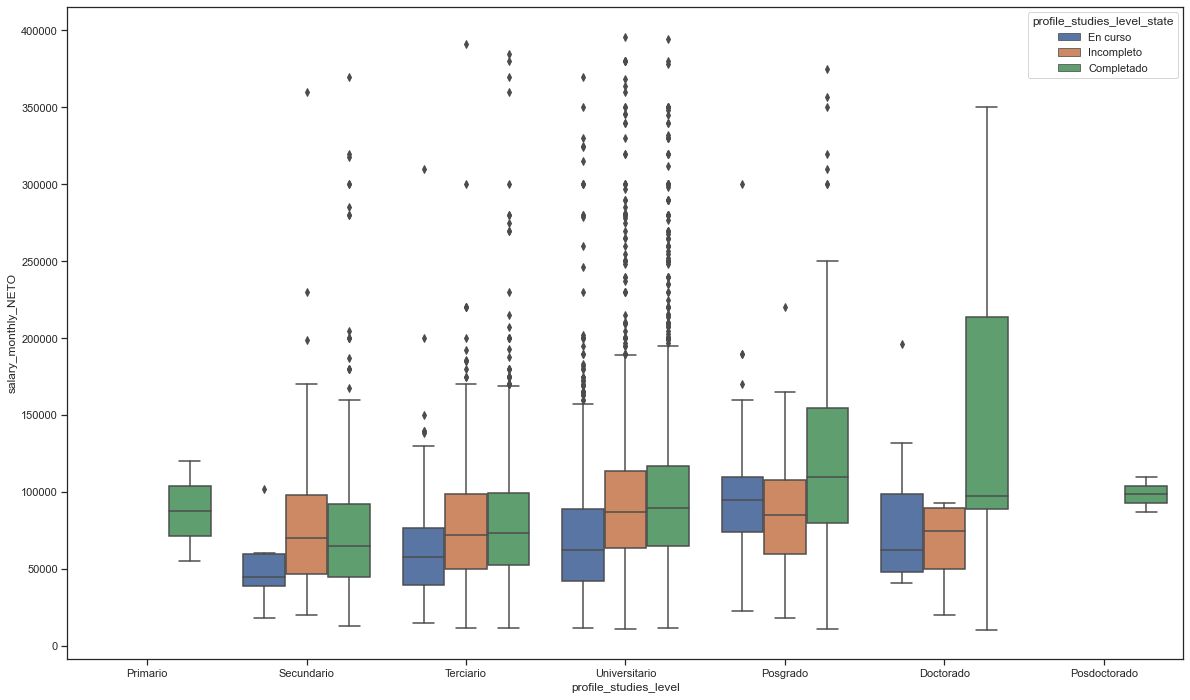

In [19]:
plt.figure(figsize=(20, 12))

seaborn.boxplot(data=df,
                x=nivel,
                y=neto,
                hue=estado,
                hue_order=sorted_studies_state,
                order=sorted_studies_levels);

In [20]:
# Averiguamos las subpoblaciones más numerosas.
df[nivel].value_counts()[sorted_studies_levels]

Primario            2
Secundario        404
Terciario        1035
Universitario    3751
Posgrado          300
Doctorado          26
Posdoctorado        2
Name: profile_studies_level, dtype: int64

In [21]:
new_groups = {
    'Primario': 'Pre-Universidad',
    'Secundario': 'Pre-Universidad',
    'Terciario': 'Pre-Universidad',
    'Universitario': 'Post-Universidad',
    'Posgrado': 'Post-Universidad',
    'Doctorado': 'Post-Universidad',
    'Posdoctorado': 'Post-Universidad'
}

sorted_studies = ['Pre-Universidad', 'Post-Universidad']

s_studies = df[nivel].replace(new_groups)

<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='Count'>

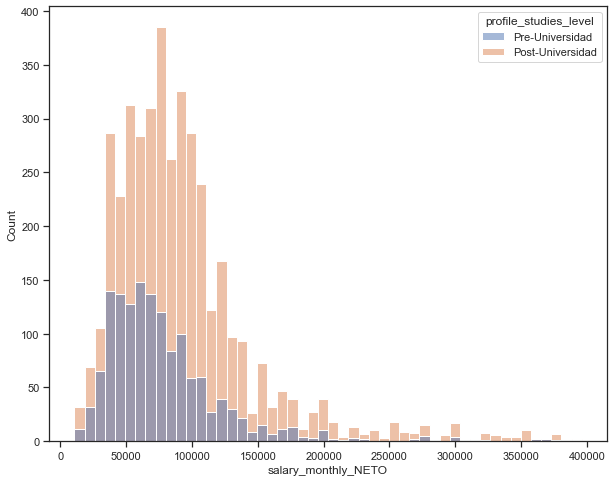

In [31]:
fig = plt.figure(figsize=(10, 8))
seaborn.histplot(df,
                 x=neto,
                 hue=s_studies,
                 hue_order=sorted_studies,

                 bins=50)

In [23]:

print(df[s_studies=='Pre-Universidad'][neto].describe())
print(df[s_studies=='Post-Universidad'][neto].describe())

count      1441.000000
mean      78432.800056
std       47512.276631
min       12000.000000
25%       48000.000000
50%       68600.000000
75%       93000.000000
max      391000.000000
Name: salary_monthly_NETO, dtype: float64
count      4079.000000
mean      92267.841216
std       55110.666001
min       10700.000000
25%       56000.000000
50%       81000.000000
75%      110000.000000
max      396000.000000
Name: salary_monthly_NETO, dtype: float64


#### Grafico de frecuencias
Para que sea más comparativo, ya que hay más datos de Post-Universidad

<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='Density'>

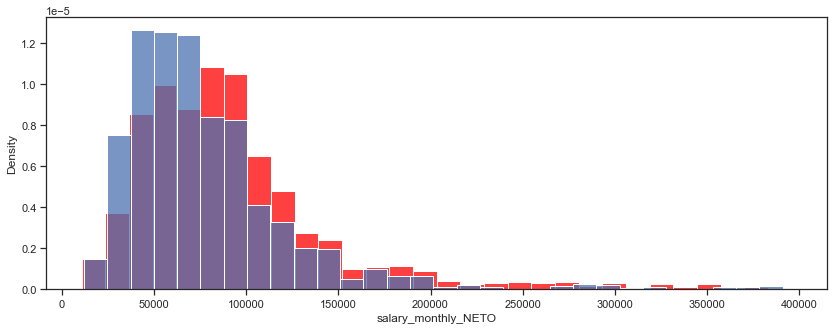

In [39]:
fig = plt.figure(figsize=(14, 5))

seaborn.histplot(df[s_studies=='Post-Universidad'][neto], stat="density",bins=30,color='red')
seaborn.histplot(df[s_studies=='Pre-Universidad'][neto], stat="density",bins=30)


**Respuesta**

Al estudiar la grafica con la comparativa de los histogramas y las medidas de centralizacion y dispersión, pareciera que ambas variables no son independientes, ya que al parecer la subpoblación de post-universidad obtiene mayores salarios, pero para estar seguros se debería realizar una prueba de independencia

## d) Densidad conjunta condicional

Elija dos variables **numéricas** y una variable **categórica**.
Estudie la dispersión (*scatterplot*) de las dos variables numéricas, discriminando en color por la variable categórica (**hue** en *seaborn*).

In [ ]:
plt.figure(figsize=(10, 6))

seaborn.scatterplot(data=df,
                    x=edad,
                    y=neto,
                    hue=dolares);

**Respuesta**

- Variables Numéricas: `salary_monthly_NETO`, y `profile_age`.
- Variable Categórica: `salary_in_usd`.

El *scatterplot* muestra la relación entre dos variables numéricas continuas (`salary_monthly_NETO` y `profile_age`), donde se utiliza el color para distinguir una variable categórica adicional (`salary_in_usd`).

Es importante mencionar que la cantidad de salarios en pesos, en nuestra muestra, es mucho mayor a la cantidad de salarios en dólares.
Por lo que se observa que los puntos correspondientes a salarios en pesos se amontonan.

En el gráfico es posible notar un patrón que ya hemos mencionado anteriormente.
Los salarios más altos están, en su mayoría, dolarizados.
A simple vista existe una separación próxima a los **150000** pesos, donde la mayoría de los puntos celestes se encuentran por debajo, mientras que la mayoría de los puntos amarillos se encuentran por encima.

También se podría notar que los jóvenes (entre 18 y 22 años) parecen ser los que menos cobran.
Quizás por su falta de experiencia laboral (análisis que ya realizamos en clases pasadas).

Por último, no parece que exista algún otro tipo de relación (o dependencia) entre el salario de un programador y su edad.
Al menos no es posible hacer una conjetura contando solo con este único gráfico.